In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# for OLS method
import statsmodels.api as sm
#the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
# Load the data from a .csv 
data = pd.read_csv(r'C:\Users\nijat\Desktop\PYTHON - KURS\Ders 12 - SLR MLR class\Income_happiness.csv')
data

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398
...,...,...
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664


In [3]:
data.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


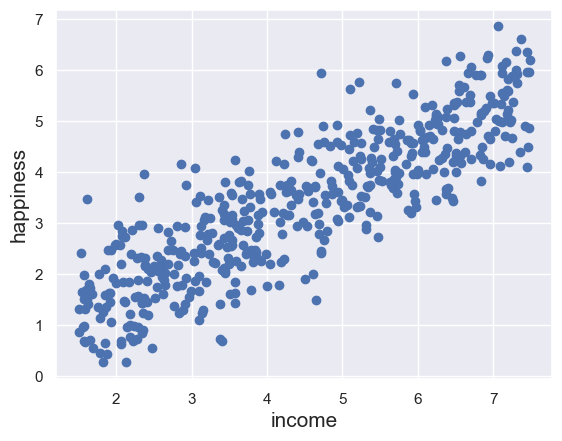

In [4]:
plt.scatter(data['income'],data['happiness'])
plt.xlabel('income', fontsize = 15)
plt.ylabel('happiness', fontsize = 15)
plt.show()

<AxesSubplot:xlabel='income'>

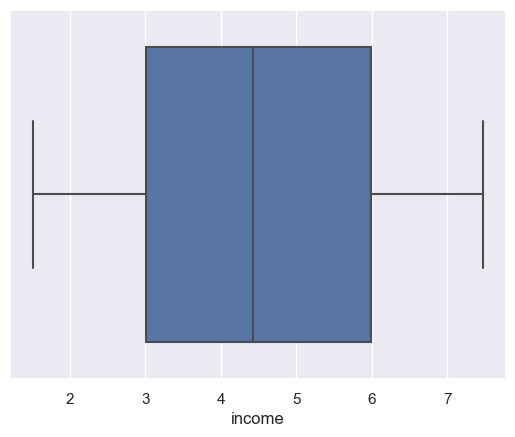

In [34]:
sns.boxplot(x=data['income'],data=data)

<AxesSubplot:xlabel='happiness'>

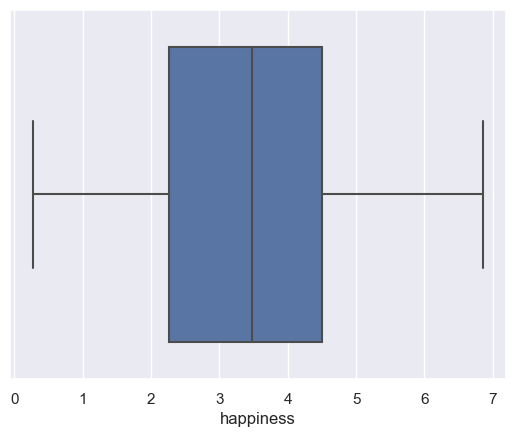

In [35]:
sns.boxplot(x=data['happiness'],data=data)

In [5]:
# Define the dependent and the independent variables

# Following the regression equation, our dependent variable (y) is the happiness
y = data['happiness']
# Similarly, our independent variable (x) is the income score
x1 = data['income']

In [6]:
# Create Regression using OLS

# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

In [7]:
# Print summary of the regression.

# R-squared - shows accuracy
# Adj. R-squared - how important is independend variable

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          3.96e-151
Time:                        13:17:58   Log-Likelihood:                -540.72
No. Observations:                 498   AIC:                             1085.
Df Residuals:                     496   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2043      0.089      2.299      0.022       0.030       0.379
income         0.7138      0.019     38.505      0.000       0.677       0.750
==============================================================================
Omnibus:                        1.396   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.349
Skew:                           0.127   Prob(JB):                        0.509
Kurtosis:                       2.995   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

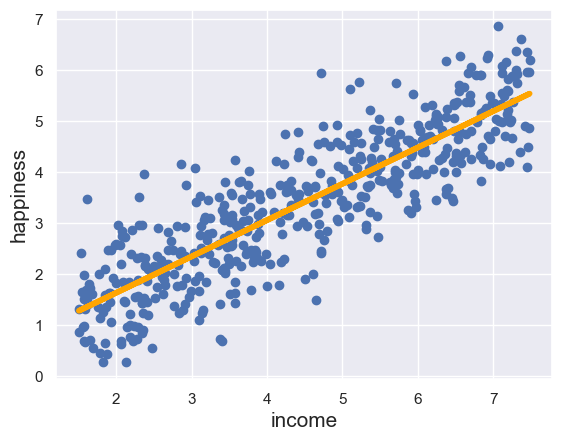

In [8]:
# Create a scatter plot
plt.scatter(x1,y)

# Define the regression equation, so we can plot it later
yhat = 0.7138*x1 + 0.2045

# Plot the regression line against the independent variable (SAT) , lw - line width
fig = plt.plot(x1,yhat, lw=4, c='orange')
# Label the axes
plt.xlabel('income', fontsize = 15)
plt.ylabel('happiness', fontsize = 15)
plt.show()

In [9]:
# Create Regression using sklearn library

# There is a single independent variable: 'income'
x2 = data[['income']]
# and a single depended variable: 'happiness'
y2 = data['happiness']

In [10]:
# We start by creating a linear regression object
reg = LinearRegression()

In [11]:
# First argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x2,y2)

LinearRegression()

In [12]:
# Getting the coefficients of the regression
reg.coef_

array([0.71382551])

In [13]:
reg.intercept_

0.20427039623160237

In [14]:
# we want to predict values
predicted = reg.predict(x2)
predicted

array([2.96152667, 3.75867986, 3.71911648, 2.49877145, 5.34125092,
       2.86658506, 3.54106017, 3.41513166, 2.43256991, 3.51635969,
       3.51130944, 2.18383624, 5.28633585, 5.53415794, 1.7159689 ,
       2.03106825, 1.88518187, 1.90899797, 3.5989963 , 1.6278348 ,
       5.42298877, 2.72287448, 1.9379753 , 2.73317421, 3.93558   ,
       4.98118583, 2.98848252, 1.83968425, 1.9035411 , 2.02424619,
       5.15343384, 1.52887726, 2.76620668, 5.07718449, 1.68231885,
       3.9334414 , 1.80546213, 5.25541848, 3.19567934, 1.6008601 ,
       3.81748253, 3.04685917, 2.39218744, 2.83320231, 2.9092617 ,
       4.02945835, 3.91339326, 3.94556523, 5.27358764, 2.64842401,
       1.81280411, 4.03775389, 4.64826679, 4.11807734, 3.08396537,
       4.85143061, 4.50807707, 5.16472447, 5.34027157, 2.17252896,
       5.1696974 , 3.53797301, 4.75012017, 4.60620474, 4.54015955,
       4.11940272, 1.3389494 , 1.40383556, 4.13027356, 3.09090289,
       3.77703364, 3.67601911, 1.27948795, 2.24914053, 4.40006

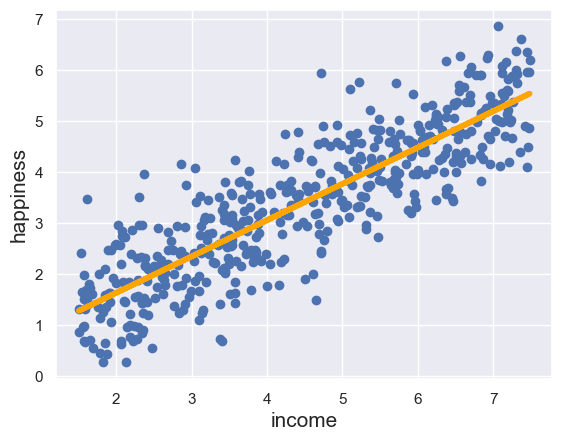

In [15]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x2,y2)

# Parametrized version of the regression line
yhat = reg.coef_*x2 + reg.intercept_

# Non-parametrized version of the regression line
# yhat = 0.7138*x1 + 0.2045

# Plotting the regression line
fig = plt.plot(x2,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('income', fontsize = 15)
plt.ylabel('happiness', fontsize = 15)
plt.show()

In [16]:
y2

0      2.314489
1      3.433490
2      4.599373
3      2.791114
4      5.596398
         ...   
493    4.568705
494    2.535002
495    4.397451
496    2.070664
497    3.710193
Name: happiness, Length: 498, dtype: float64

In [17]:
predicted

array([2.96152667, 3.75867986, 3.71911648, 2.49877145, 5.34125092,
       2.86658506, 3.54106017, 3.41513166, 2.43256991, 3.51635969,
       3.51130944, 2.18383624, 5.28633585, 5.53415794, 1.7159689 ,
       2.03106825, 1.88518187, 1.90899797, 3.5989963 , 1.6278348 ,
       5.42298877, 2.72287448, 1.9379753 , 2.73317421, 3.93558   ,
       4.98118583, 2.98848252, 1.83968425, 1.9035411 , 2.02424619,
       5.15343384, 1.52887726, 2.76620668, 5.07718449, 1.68231885,
       3.9334414 , 1.80546213, 5.25541848, 3.19567934, 1.6008601 ,
       3.81748253, 3.04685917, 2.39218744, 2.83320231, 2.9092617 ,
       4.02945835, 3.91339326, 3.94556523, 5.27358764, 2.64842401,
       1.81280411, 4.03775389, 4.64826679, 4.11807734, 3.08396537,
       4.85143061, 4.50807707, 5.16472447, 5.34027157, 2.17252896,
       5.1696974 , 3.53797301, 4.75012017, 4.60620474, 4.54015955,
       4.11940272, 1.3389494 , 1.40383556, 4.13027356, 3.09090289,
       3.77703364, 3.67601911, 1.27948795, 2.24914053, 4.40006

In [18]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y2, predicted)
mse = metrics.mean_squared_error(y2, predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y2, predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae)) # MEAN ABSOLUTE ERROR
# actual - predicted 
print('MSE is {}'.format(mse)) # MEAN SQUARED ERROR
# The Mean Squared Error measures how close a regression line is to a set of data points.
print('RMSE is {}'.format(rmse)) # ROOT MEAN SQUARED ERROR
# mse kokalti
print('R2 score is {}'.format(r2)) # R2
# accuracy

The model performance for testing set
--------------------------------------
MAE is 0.574598873075896
MSE is 0.5135973650248548
RMSE is 0.716657076309761
R2 score is 0.7493217544889172


In [19]:
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [20]:
new_data = pd.DataFrame(data=[3.862647,4.979381,4.923957,3.214372,7.196409],columns=['income'])
new_data

,income
0,3.862647
1,4.979381
2,4.923957
3,3.214372
4,7.196409


In [21]:
new_predict=reg.predict(new_data)

In [22]:
new_data['actual']=data['happiness']
new_data['prediction']=new_predict

new_data

,income,actual,prediction
0,3.862647,2.314489,2.961526
1,4.979381,3.433490,3.758680
2,4.923957,4.599373,3.719117
3,3.214372,2.791114,2.498771
4,7.196409,5.596398,5.341251


# Train - test

In [23]:
# Following the regression equation, our dependent variable (y) is the happiness
y = data['happiness']
# Similarly, our independent variable (x) is the income score
x = data[['income']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [25]:
reg = LinearRegression()

In [26]:
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
reg.coef_

array([0.7247687])

In [28]:
reg.intercept_

0.14170387227353665

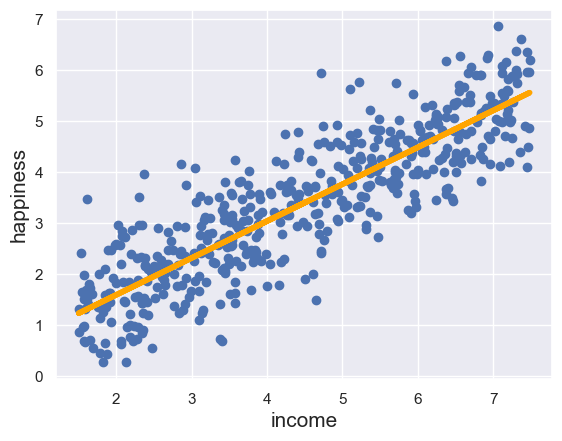

In [29]:
# Create a scatter plot
plt.scatter(x1,y)

# Define the regression equation, so we can plot it later
yhat = reg.coef_*x + reg.intercept_

# Plot the regression line against the independent variable (SAT) , lw - line width
fig = plt.plot(x1,yhat, lw=4, c='orange')
# Label the axes
plt.xlabel('income', fontsize = 15)
plt.ylabel('happiness', fontsize = 15)
plt.show()

In [30]:
y_pred = reg.predict(X_test)

In [31]:
y_pred

array([3.21752987, 2.21792257, 3.20280332, 1.79020704, 1.74394749,
       2.39018719, 4.44664262, 4.86010664, 1.89050708, 3.50456863,
       4.09833273, 2.4318678 , 2.85594355, 3.54519132, 2.78796716,
       1.80768864, 2.52124048, 5.16673969, 2.45094439, 3.996441  ,
       1.83486036, 2.72998006, 2.63135811, 1.23340488, 4.61112137,
       1.72884986, 2.46409207, 5.3782968 , 4.21884267, 4.12789401,
       1.34529138, 3.72063824, 2.83545189, 3.71043375, 4.0008309 ,
       4.01012804, 1.2713695 , 2.47646914, 1.31859325, 2.24910091,
       5.35598486, 4.42244764, 5.0893214 , 4.83614181, 2.94122983,
       2.15161714, 1.6263909 , 3.1687238 , 2.67722482, 1.46401227,
       4.0291672 , 2.98869745, 5.14038236, 3.7164133 , 3.58847209,
       3.3425148 , 3.54804131, 3.94616611, 4.93059286, 3.81954393,
       4.89818897, 1.55970378, 5.09603988, 2.34495858, 2.2134292 ,
       5.38998089, 4.72238072, 3.7692388 , 2.40771063, 5.32646295,
       4.52828042, 3.42736682, 3.04261746, 3.07258943, 1.94085

In [32]:
X_test['actual'] = y_test
X_test['predicted'] = y_pred

X_test

,income,actual,predicted
487,4.243873,4.754168,3.217530
73,2.864664,4.159609,2.217923
231,4.223554,2.295700,3.202803
175,2.274523,2.311554,1.790207
237,2.210696,2.861274,1.743947
...,...,...,...
247,5.964058,3.427723,4.464266
383,4.851314,3.835578,3.657784
19,1.994275,2.584729,1.587092
321,4.800344,2.842868,3.620843


In [33]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.6269683431894553
MSE is 0.590146394343082
RMSE is 0.768209863476825
R2 score is 0.6662585264303966
